# **Hate Speech Datasets**

Here are explored two datasets that could have been possible candidates to run the experiments on.

In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt

from datasets import load_dataset
from io import StringIO

# **Large-Scale Hate Speech Detection**

The dataset used for this experiment is from another study, [*Large-Scale Hate Speech Detection with Cross-Domain Transfer*](https://aclanthology.org/2022.lrec-1.238.pdf), and contains 200,000 tweets labeled as using normal (0), offensive (1), hate (2) speech.

Each tweet was annoted by 5 annotators randomly selected from a set of 20 annotators, 75% graduate students and the rest of 25% undergraduate students. The criteria on which each tweet is labeled is the following:
- **hate speech**: target, incite violence against, threaten, or call for pshyical damage for an individual or a group of people because of some identifying trait or characteristics
- **offensive language**: humiliate, taunt, discriminate, or insult an individual or a group of people in any form
- **normal**: otherwise.

In this experiment, we only use the English tweets labeled as **hate speech**.


## **Download**

In [ ]:
dataset_url = "https://raw.githubusercontent.com/metunlp/hate-speech/refs/heads/master/dataset_v1/Toraman22_hate_speech_v1.tsv"
response = requests.get(dataset_url)
hate_speech_df = pd.read_csv(StringIO(response.text), sep="\t")

print("Hate Speech Tweets Dataset")
print("Shape:", hate_speech_df.shape)
print("Columns:", hate_speech_df.columns.tolist())
print("First 5 rows:")
print(hate_speech_df.head())

Hate Speech Tweets Dataset - Copy
Shape: (213610, 20)
Columns: ['tweet_id', 'user_id', 'user_name', 'screen_name', 'verified', 'created_at', 'friends_count', 'followers_count', 'statuses_count', 'favourites_count', 'default_pic', 'label', 'topic', 'language', 'date', 'text', 'label_0', 'label_1', 'label_2', 'label_score']
First 5 rows:
              tweet_id       user_id      user_name     screen_name verified  \
0  1344792819660189696  1.121568e+18         İlksen  Oetkisizeleman    False   
1  1344785495486771200  3.342883e+09  özkan özkanlı     OzkanOzkanl    False   
2  1344767690225954816  1.341429e+18      ～Zeynep🌹～       ArcaSayin    False   
3  1344762665764343809  8.838116e+17    kupa valesi  OguzArdaSancar    False   
4  1344760030537670657  1.328683e+18    emrecan1903  damsko44354161    False   

                       created_at  friends_count  followers_count  \
0  Fri Apr 26 00:13:46 +0000 2019         2274.0           2373.0   
1  Tue Jun 23 16:49:27 +0000 2015          

/tmp/ipython-input-1470509179.py:3: DtypeWarning: Columns (0,4,10) have mixed types. Specify dtype option on import or set low_memory=False.
  hate_speech_df = pd.read_csv(StringIO(response.text), sep="\t")


In [ ]:
ENGLISH = 1.0
HATE_SPEECH_LABEL = 2.0

# only keep the tweets in English labeled as hate speech
hate_speech_df = hate_speech_df.loc[(hate_speech_df["language"] == ENGLISH) & (hate_speech_df["label"] == HATE_SPEECH_LABEL)]
print("Only Hate Speech Dataset")
print("Shape:", hate_speech_df.shape)

Only Hate Speech Dataset
Shape: (7325, 20)


## **Analysis**

In [ ]:
print(hate_speech_df["text"].sample(5).to_string(index=False))

    Nothing is new under the sun, shortly before Biggie Smalls died he released a line of clothing similar to what this… https://t.co/pRlye2rHpx
Now that we are within hours of 2021.  Let's all pledge to NEVER forget the over 400K people Trump has killed &amp; tho… https://t.co/eC1ytdFW49
                                                                                       Damn!  Even with a Telepromter... Joe Biden, struggles...
    When PM @ImranKhanPTI called terrorist #OsamaBinLaden a martyr , so religious fanatics following his ideology destr… https://t.co/kbnDqZZunq
    Barbarism on Indian Muslims BY HINDU EXTREMISTS, INDIAN MUSLIMS SHOULD DIE AFTER KILLING IN THEIR DEFENCE. THEIR FU… https://t.co/uL5EQTpUJ7


# **UC Berkeley Hate Speech**



In [18]:
ucb_hate_speech_ds = load_dataset("ucberkeley-dlab/measuring-hate-speech")
ucb_hate_speech_df = ucb_hate_speech_ds["train"].to_pandas()

print("UC Berkeley Hate Speech Dataset")
print("Shape:", ucb_hate_speech_df.shape)
print("Columns:", ucb_hate_speech_df.columns.tolist())
print("First 5 rows:")
print(ucb_hate_speech_df.head())

UC Berkeley Hate Speech Dataset
Shape: (135556, 143)
Columns: ['comment_id', 'annotator_id', 'platform', 'sentiment', 'respect', 'insult', 'humiliate', 'status', 'dehumanize', 'violence', 'genocide', 'attack_defend', 'hatespeech', 'hate_speech_score', 'text', 'infitms', 'outfitms', 'annotator_severity', 'std_err', 'annotator_infitms', 'annotator_outfitms', 'hypothesis', 'target_race_asian', 'target_race_black', 'target_race_latinx', 'target_race_middle_eastern', 'target_race_native_american', 'target_race_pacific_islander', 'target_race_white', 'target_race_other', 'target_race', 'target_religion_atheist', 'target_religion_buddhist', 'target_religion_christian', 'target_religion_hindu', 'target_religion_jewish', 'target_religion_mormon', 'target_religion_muslim', 'target_religion_other', 'target_religion', 'target_origin_immigrant', 'target_origin_migrant_worker', 'target_origin_specific_country', 'target_origin_undocumented', 'target_origin_other', 'target_origin', 'target_gender_men'

In [3]:
ucb_hate_speech_df.columns.tolist()

['comment_id',
 'annotator_id',
 'platform',
 'sentiment',
 'respect',
 'insult',
 'humiliate',
 'status',
 'dehumanize',
 'violence',
 'genocide',
 'attack_defend',
 'hatespeech',
 'hate_speech_score',
 'text',
 'infitms',
 'outfitms',
 'annotator_severity',
 'std_err',
 'annotator_infitms',
 'annotator_outfitms',
 'hypothesis',
 'target_race_asian',
 'target_race_black',
 'target_race_latinx',
 'target_race_middle_eastern',
 'target_race_native_american',
 'target_race_pacific_islander',
 'target_race_white',
 'target_race_other',
 'target_race',
 'target_religion_atheist',
 'target_religion_buddhist',
 'target_religion_christian',
 'target_religion_hindu',
 'target_religion_jewish',
 'target_religion_mormon',
 'target_religion_muslim',
 'target_religion_other',
 'target_religion',
 'target_origin_immigrant',
 'target_origin_migrant_worker',
 'target_origin_specific_country',
 'target_origin_undocumented',
 'target_origin_other',
 'target_origin',
 'target_gender_men',
 'target_gende

In [19]:
categories = ["race", "religion", "origin", "gender", "sexuality", "age", "disability", "politics"]
ucb_hate_speech_df.rename(columns={
    "target_race": "race",
    "target_religion": "religion",
    "target_origin": "origin",
    "target_gender": "gender",
    "target_sexuality": "sexuality",
    "target_age": "age",
    "target_disability": "disability",
    "target_politics": "politics",
}, inplace=True)

Next, we need to aggregate the columns by the scores given by each annotator. The hyphotesis score will be the *mean* of all the scores for that comment, and the final hate speech category will be the most voted one.

In [20]:
# gather the aggregate type for each comment
ucb_aggregations = {}
for col in ucb_hate_speech_df.columns:
    if col == 'comment_id':
        continue

    if col == 'hypothesis':
        ucb_aggregations[col] = 'mean'
    elif ucb_hate_speech_df[col].dtype == 'bool':
        ucb_aggregations[col] = 'sum'
    else:
        ucb_aggregations[col] = 'first'

# group each comment based on the annotator's score
ucb_hate_speech_df = ucb_hate_speech_df.groupby('comment_id', as_index=False).agg(ucb_aggregations)

# add a new column with the hate speech label
ucb_hate_speech_df['hate_speech_label'] = ucb_hate_speech_df[categories].idxmax(axis=1)

print("UC Berkeley Hate Speech Dataset Aggregated")
print("Shape:", ucb_hate_speech_df.shape)

UC Berkeley Hate Speech Dataset Aggregated
Shape: (39565, 144)


First step is to extract those comments that are definetely hate speech, depending on their hate speech score.

In [21]:
ucb_hate_speech_df = ucb_hate_speech_df[ucb_hate_speech_df['hypothesis'] >= 0.5]
ucb_hate_speech_df = ucb_hate_speech_df.drop_duplicates(subset=['comment_id'])
print("Only Hate Speech Dataset")
print("Shape:", ucb_hate_speech_df.shape)

Only Hate Speech Dataset
Shape: (508, 144)


## **Analysis**

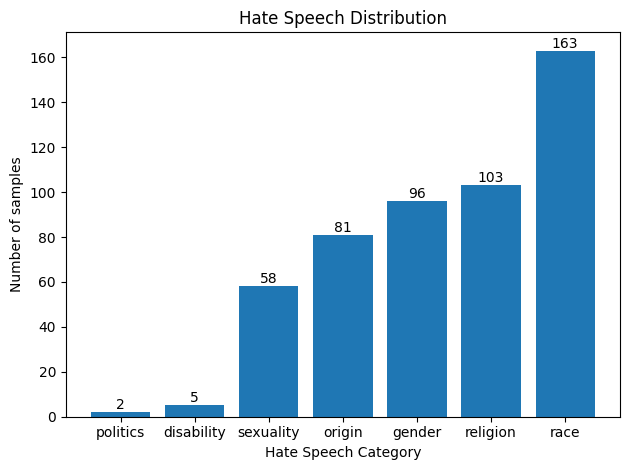

In [31]:
counts = ucb_hate_speech_df["hate_speech_label"].value_counts().sort_values()

plt.figure()
bars = plt.bar(counts.index, counts.values)
plt.xlabel("Hate Speech Category")
plt.ylabel("Number of samples")
plt.title("Hate Speech Distribution")
plt.xticks(rotation=0)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        str(height),
        ha="center",
        va="bottom"
    )

plt.tight_layout()
plt.show()

## **Final version**

In [32]:
ucb_hate_speech_df = ucb_hate_speech_df[~ucb_hate_speech_df["hate_speech_label"].isin(["politics", "disability"])]
print("Final Hate Speech Dataset")
print("Shape:", ucb_hate_speech_df.shape)

Final Hate Speech Dataset
Shape: (501, 144)
